In [1]:
# standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# import operator for dictionary sorting operations
import operator

In [2]:
# import ames training dataset
df = pd.read_csv('AmesHousing.csv')
# observe the shape of dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (2930, 82)


In [3]:
# panda configuration to show all columns
pd.set_option('display.max_columns', None)

# print out and show the variables for training dataset
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1

In [4]:
# drop order and id since it is useless
df = df.drop(['Order','PID'], axis = 1)

# Removing irrelavent columns and rows

In [5]:
# after studying the dataset, the variable in MSZoning includes non-residential areas and so we need to exlude them
print(df['MS Zoning'].value_counts())  

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64


In [6]:
# only we can see that from this training data, there is FV and C (non-residential)
# we will need to exclude them from this dataset (need to do the same thing to the test set also)

df.drop(df[(df['MS Zoning'] == 'FV')].index, inplace = True)
df.drop(df[(df['MS Zoning'] == 'C (all)')].index, inplace = True)
df.drop(df[(df['MS Zoning'] == 'I (all)')].index, inplace = True)
df.drop(df[(df['MS Zoning'] == 'A (agr)')].index, inplace = True)
print(df['MS Zoning'].value_counts())
print(df.shape,"\n")

RL    2273
RM     462
RH      27
Name: MS Zoning, dtype: int64
(2762, 80) 



In [7]:
# reset index after dropping rows
df = df.reset_index(drop=True)

In [8]:
# check to see are there duplicate rows
# don't need sales price to check duplicated rows
duplicated = df[df.duplicated(keep=False)]
print("Duplicated row(s): ", len(duplicated))
# we can see that there is no duplication

Duplicated row(s):  0


# Data Cleaning and EDA (removing null values)

In [9]:
# show datatype and non-null count
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2762 non-null   int64  
 1   MS Zoning        2762 non-null   object 
 2   Lot Frontage     2295 non-null   float64
 3   Lot Area         2762 non-null   int64  
 4   Street           2762 non-null   object 
 5   Alley            143 non-null    object 
 6   Lot Shape        2762 non-null   object 
 7   Land Contour     2762 non-null   object 
 8   Utilities        2762 non-null   object 
 9   Lot Config       2762 non-null   object 
 10  Land Slope       2762 non-null   object 
 11  Neighborhood     2762 non-null   object 
 12  Condition 1      2762 non-null   object 
 13  Condition 2      2762 non-null   object 
 14  Bldg Type        2762 non-null   object 
 15  House Style      2762 non-null   object 
 16  Overall Qual     2762 non-null   int64  
 17  Overall Cond  

In [10]:
# check the total number of null in each column
print(df.isnull().sum().to_string())

MS SubClass           0
MS Zoning             0
Lot Frontage        467
Lot Area              0
Street                0
Alley              2619
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         16
Mas Vnr Area         16
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            76
Bsmt Cond            76
Bsmt Exposure        78
BsmtFin Type 1       76
BsmtFin SF 1          1
BsmtFin Type 2       77
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical      

In [11]:
# Alley, PoolQC, Fence, MiscFeature have a lot of null values
# we will need to observe what they mean in order to decide whether to drop them
# we will not drop "alley" and "fence" because they might have some relation with price
# the NA for those categories just mean that the property does not have it

# as for poolQC and MiscFeature, we will evaluate each of them
# for PoolQC, we will drop it because there is already a variable with the pool area which we can focus on
# for MiscFeature, we will also drop it because there is MiscValue which is similar but more helpful in price prediction
df = df.drop(['Pool QC', 'Misc Feature', 'Mo Sold'], axis = 1)
DROPPED_VARIABLE  = ['Pool QC', 'Misc Feature', 'Mo Sold']

# Null Values for Categorical Value

In [12]:
# need to observe the other null values that might be possible to be add replacements
# print value counts for all 'objects' with more than 1 null value
# use to look at the type, percentage of nulls to decide what to do with empty values
# dtype "O" means object
def objects_w_null(df):
  for i in df:
    if df[i].dtype == 'O':
      if df[i].isnull().sum() > 0: 
        print(df[i].value_counts())  
        print("Total Null Values: " + str(df[i].isnull().sum()))
        # round up to two decimal place: round(num, 2)
        print("Percentage of Nulls = " + str(np.round((df[i].isnull().sum() / len(df.index) * 100), 2)) + "%") 
        print("\n")
      
objects_w_null(df)

Grvl    119
Pave     24
Name: Alley, dtype: int64
Total Null Values: 2619
Percentage of Nulls = 94.82%


None       1643
BrkFace     848
Stone       229
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64
Total Null Values: 16
Percentage of Nulls = 0.58%


TA    1262
Gd    1101
Ex     238
Fa      85
Name: Bsmt Qual, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


TA    2465
Gd     116
Fa      98
Po       4
Ex       3
Name: Bsmt Cond, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


No    1781
Av     394
Gd     284
Mn     225
Name: Bsmt Exposure, dtype: int64
Total Null Values: 78
Percentage of Nulls = 2.82%


Unf    781
GLQ    778
ALQ    425
Rec    283
BLQ    265
LwQ    154
Name: BsmtFin Type 1, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


Unf    2339
Rec     106
LwQ      89
BLQ      68
ALQ      50
GLQ      33
Name: BsmtFin Type 2, dtype: int64
Total Null Values: 77
Percentage of Nulls = 2.79%


SBrkr    2525
FuseA     1

Alley
- not considered as missing value
- the null means "No Alley"

Mas Vrn Type**
- Some missing value 
- maybe fill with the mode which is "None"

Bsmt Qual
- not considered as missing value
- the null for means "No Basement"

Basmt Cond
- same as BsmtQual

Bsmt Exposure**
- should be same as BastQual
- but there is two extra value missing need to find out

BsmtFin Type 1
- same as BsmtQual

BsmtFin Type 2**
- same as BsmtQual
- but extra one missing value

Electrical**
- one missing need to fill it

Fireplace Qu
- missing value means no fireplace

Garage Type
- missing value means no garage

Garage Finish/Qual/Cond**
- missing value means no garage
- extra two missing need find out

Fence
- missing value means no fence

Pool QC
- missing value means no piil

Misc Feature
- missing value means no extra feature

In [13]:
# find out what are those real missing value first
def difference(df, base, compare):
    first = pd.isnull(df[base])
    second = pd.isnull(df[compare])
    arr = []
    for i in first.index:
        if first[i] != second[i]:
            arr.append(i)
    return arr

## For BsmtFin Type 2

In [14]:
missing_index = difference(df, "BsmtFin Type 1", "BsmtFin Type 2")
print("Missing value index is", missing_index)

Missing value index is [415]


In [15]:
# we can see that basement is available for this particular resident but bsmtfin type 2 is null
# we will fill it with the mode[0]
# index 0 only get the value without the type

def replace_specific(df, column, index):
    mode = df[column].mode()[0]
    for i in index:
        df[column].values[i] = mode 

In [16]:
replace_specific(df, "BsmtFin Type 2", missing_index)

## For Bsmt Exposure

In [17]:
missing_index = difference(df, "BsmtFin Type 1", "Bsmt Exposure")
print("Missing value index is", missing_index)
replace_specific(df, "Bsmt Exposure", missing_index)

Missing value index is [65, 2617]


## For Electrical

In [18]:
# this one is different from the others, no cell to compare with, just missing value alone
# create another function
def seek_null(df, column):
    is_null = pd.isnull(df[column])
    arr = []
    for i in is_null.index:
        if is_null[i] == True:
            arr.append(i)
    return arr

In [19]:
missing_index = seek_null(df, "Electrical")
print("Missing value index is", missing_index)
replace_specific(df, "Electrical", missing_index)

Missing value index is [1477]


## For Garage Finish/Qual/Cond

In [20]:
column = ["Garage Finish", "Garage Qual", "Garage Cond"]

for i in column:
    missing_index = difference(df, "Garage Type", i)
    print("Missing value index in", i, "is", missing_index)
    
# same two row got missing values
for i in column:
    replace_specific(df, i, missing_index)

Missing value index in Garage Finish is [1262, 2101]
Missing value index in Garage Qual is [1262, 2101]
Missing value index in Garage Cond is [1262, 2101]


## For Mas Vrn Type

In [21]:
# new function need to be created because this is to be compare with a numerical column
def difference_w_num(df, num, cat):
    first = []
    
    for i in df[num]:
        if i <= 0 or pd.isnull(i): 
            first.append(False)
        else:
            first.append(True) # got Mas Vnr

    second = pd.isnull(df[cat])
    arr = []
    for i in second.index:
        if second[i] == True: 
            if first[i] == second[i]: # got area but not type means missing value
                arr.append(i)
    return arr

col_num = "Mas Vnr Area"
col_cat = "Mas Vnr Type"

missing_index = difference_w_num(df, col_num, col_cat)
print("Missing value index is", missing_index)

Missing value index is []


# Replacing all NA (not null) in object

In [22]:
objects_w_null(df) 
# now fill all the values that are NA with None, indicating that it is unavailable

Grvl    119
Pave     24
Name: Alley, dtype: int64
Total Null Values: 2619
Percentage of Nulls = 94.82%


None       1643
BrkFace     848
Stone       229
BrkCmn       25
CBlock        1
Name: Mas Vnr Type, dtype: int64
Total Null Values: 16
Percentage of Nulls = 0.58%


TA    1262
Gd    1101
Ex     238
Fa      85
Name: Bsmt Qual, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


TA    2465
Gd     116
Fa      98
Po       4
Ex       3
Name: Bsmt Cond, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


No    1783
Av     394
Gd     284
Mn     225
Name: Bsmt Exposure, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


Unf    781
GLQ    778
ALQ    425
Rec    283
BLQ    265
LwQ    154
Name: BsmtFin Type 1, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


Unf    2340
Rec     106
LwQ      89
BLQ      68
ALQ      50
GLQ      33
Name: BsmtFin Type 2, dtype: int64
Total Null Values: 76
Percentage of Nulls = 2.75%


Gd    704
TA    579
Fa   

In [23]:
column = ["Alley", "Mas Vnr Type", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Fireplace Qu", "Garage Type",
         "Garage Finish", "Garage Qual", "Garage Cond", "Fence"]

df[column] = df[column].fillna("None")
    
# Now there are no null values in object

# Null values for numerical data

In [24]:
# np.number

def numeric_w_null(df):
  for i in df:
    if df[i].dtype != 'O': # not object
      if df[i].isnull().sum() > 0: 
        print(i)
        print("Total Null Values: " + str(df[i].isnull().sum()))
        # round up to two decimal place: round(num, 2)
        print("Percentage of Nulls = " + str(np.round((df[i].isnull().sum() / len(df.index) * 100), 2)) + "%") 
        print("\n")
      
numeric_w_null(df)

Lot Frontage
Total Null Values: 467
Percentage of Nulls = 16.91%


Mas Vnr Area
Total Null Values: 16
Percentage of Nulls = 0.58%


BsmtFin SF 1
Total Null Values: 1
Percentage of Nulls = 0.04%


BsmtFin SF 2
Total Null Values: 1
Percentage of Nulls = 0.04%


Bsmt Unf SF
Total Null Values: 1
Percentage of Nulls = 0.04%


Total Bsmt SF
Total Null Values: 1
Percentage of Nulls = 0.04%


Bsmt Full Bath
Total Null Values: 2
Percentage of Nulls = 0.07%


Bsmt Half Bath
Total Null Values: 2
Percentage of Nulls = 0.07%


Garage Yr Blt
Total Null Values: 149
Percentage of Nulls = 5.39%


Garage Cars
Total Null Values: 1
Percentage of Nulls = 0.04%


Garage Area
Total Null Values: 1
Percentage of Nulls = 0.04%




## For Lot Frontage

In [25]:
column = "Lot Frontage"
missing_index = seek_null(df, column)
# print("Missing value index is", missing_index)

In [26]:
# assume null in lot frontage means 0 (no frontage)
# change to median or mean if prediction agrees
df[column] = df[column].fillna(0)

## For Mas Vrn Area

In [27]:
column = "Mas Vnr Area"
missing_index = seek_null(df, column)
# print("Missing value index is", missing_index)

In [28]:
# assume null in Mas Vnr Area means 0 (no Mas Vrn)
# This matches with the None in type which are mostly 0 area
df[column] = df[column].fillna(0)

## BsmtFin SF 1 and 2, Bsmt Unf SF, Total Bsmt SF

In [29]:
column = "BsmtFin SF 1"
missing_index = seek_null(df, column)
print("Missing value index is", missing_index)

Missing value index is [1247]


In [30]:
# the null should be 0 for square feet
# This matches with the None in type which
column = ["BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF"]
for i in column:
    df[i] = df[i].fillna(0)

## For Bsmt Full and Half Bath

In [31]:
column = "Bsmt Full Bath"
missing_index = seek_null(df, column)
print("Missing value index is", missing_index)

Missing value index is [1247, 1403]


In [32]:
# the null should be 0 as according to other columns, this 2 rows has no basement
column = ["Bsmt Full Bath", "Bsmt Half Bath"]
for i in column:
    df[i] = df[i].fillna(0)

## For Garage Yr Blt

In [33]:
column = "Garage Yr Blt"
missing_index = seek_null(df, column)
# print("Missing value index is", missing_index)

In [34]:
# it is irrelavent to put zero, mean or median for year 
# and so we will fill the null with year build instead so that is will be more appropriate 
# BUT this will cause two column to have similar data which is redundant
# so we will delete this column
column = "Garage Yr Blt"
df = df.drop([column],axis = 1)

## For Garage Cars and Area

In [35]:
column = "Garage Cars"
missing_index = seek_null(df, column)
print("Missing value index is", missing_index)

Missing value index is [2101]


In [36]:
# we can assume that an unfinished has no area and can fit no cars
# might use mean or median of Unf if allows 
column = ["Garage Cars", "Garage Area"]
for i in column:
    df[i] = df[i].fillna(0)

In [37]:
# now there are no more null values in this dataset
print(df.isnull().sum().to_string())

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bat

# Label Encoder

In [38]:
# for categorical ordinal features 
# make it into numeric manually (cause wan those none to be 0) 
df['Street'].replace(to_replace = ['Grvl', 'Pave'], value = [0, 1], inplace = True)
df['Alley'].replace(to_replace = ['None', 'Grvl', 'Pave'], value = [0, 1, 2], inplace = True)
df['Lot Shape'].replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df['Land Contour'].replace(to_replace = ['Low', 'HLS', 'Bnk', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df['Utilities'].replace(to_replace = ['ELO', 'NoSeWa', 'AllPub', 'NoSewr'], value = [0, 1, 2, 3], inplace = True)
df['Lot Config'].replace(to_replace = ['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside'], value = [0, 1, 2, 3, 4], inplace = True)
df['Land Slope'].replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df['Bldg Type'].replace(to_replace = ['Twnhs', 'TwnhsE', 'Duplex', '2fmCon', '1Fam'], value = [0, 1, 2, 3, 4], inplace = True)
df['Exter Qual'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df['Exter Cond'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df['Bsmt Qual'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df['Bsmt Cond'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df['Bsmt Exposure'].replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df['BsmtFin Type 1'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df['BsmtFin Type 2'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df['Heating QC'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df['Central Air'].replace(to_replace = ['N', 'Y'], value = [0, 1], inplace = True)
df['Kitchen Qual'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df['Fireplace Qu'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df['Garage Finish'].replace(to_replace = ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df['Garage Qual'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df['Garage Cond'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df['Paved Drive'].replace(to_replace = ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df['Fence'].replace(to_replace = ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)
df['Functional'].replace(to_replace = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 2, 3, 4, 4, 5], inplace = True)
df['Electrical'].replace(to_replace = ['FuseP', 'FuseF', 'FuseA', 'Mix', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)

# Change Year Built to Age Sold (count since built) and Age Sold (Counting from remodel)

In [39]:
df['Age Sold'] = df['Yr Sold'] - df['Year Built']
df['Age Sold (Remod)'] = abs(df['Yr Sold'] - df['Year Remod/Add'])
df = df.drop(['Year Built', 'Yr Sold', 'Year Remod/Add'], axis = 1)
DROPPED_VARIABLE += ['Year Built', 'Yr Sold', 'Year Remod/Add']

NEW_VARIABLE = ['Age Sold', 'Age Sold (Remod)']

# Linearly dependent Variables

In [40]:
# if any if the sf does not add up, print assertion error
assert not (df['Gr Liv Area'] != (df['1st Flr SF'] + df['2nd Flr SF'] + df['Low Qual Fin SF'])).any(), "Some SF do not add up"

In [41]:
assert not (df['Total Bsmt SF'] != (df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Bsmt Unf SF'])).any(), "Some SF do not add up"

In [42]:
# create a total SF and put them together
df['Total SF'] = df['Gr Liv Area'] + df['Total Bsmt SF']
NEW_VARIABLE.append('Total SF')

In [43]:
df['Total Porch SF'] = df['Wood Deck SF'] + df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']
NEW_VARIABLE.append('Total Porch SF')

In [44]:
df['Total Bath'] = df['Full Bath'] + df['Bsmt Full Bath'] + 0.5* df['Half Bath'] + 0.5 * df['Bsmt Half Bath']
NEW_VARIABLE.append('Total Bath')

# Change Neighborhood Variable

In [45]:
new_var = (df.groupby('Neighborhood')['SalePrice'].mean()  / 
           df.groupby('Neighborhood')['Total SF'].mean()).to_dict().items()
          
for j in new_var:
    df.loc[df['Neighborhood']== j[0], 'Mean Price per SF'] = j[1]

NEW_VARIABLE.append('Mean Price per SF')

In [46]:
ordinal_cat = ['Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Bldg Type', 
              'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
              'Heating QC', 'Central Air', 'Kitchen Qual', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
               'Paved Drive', 'Fence', 'Functional', 'Electrical']

df[ordinal_cat] = df[ordinal_cat].astype('int')

nominal_cat = ["MS SubClass", "MS Zoning",  "Condition 1", "Condition 2", "House Style", "Roof Style", "Roof Matl", 
               "Exterior 1st", "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
               "Garage Type", "Sale Type", "Sale Condition", "Neighborhood"]

discrete_var = ['Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath',
                    'Fireplaces', 'Full Bath', 'Garage Cars', 'Half Bath',
                    'Kitchen AbvGr', 'TotRms AbvGrd', 'Age Sold', 'Age Sold (Remod)', 'Total Bath']

In [47]:
to_drop = ordinal_cat + nominal_cat + discrete_var + ['SalePrice']
continuous_variable = df.drop(to_drop, axis = 1)

CONTINUOUS_VARIABLE = continuous_variable.columns.tolist()
DISCRETE_VARIABLE = discrete_var
NOMINAL_VARIABLE = nominal_cat
ORDINAL_VARIABLE = ordinal_cat
TARGET = ["SalePrice"]

# Check Correlation

In [48]:
def plot_correlation (corr, title): 
    fig, ax = plt.subplots(figsize = (16,12))
    ax.set_title(title, fontsize = 20)
    blue = sns.diverging_palette(240, 20, as_cmap=True)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    # darker colour means more correlation
    sns.heatmap(corr, vmin=-1, vmax=1, cmap = blue, mask = mask, xticklabels = corr.columns.values, 
                yticklabels = corr.columns.values, ax = ax)

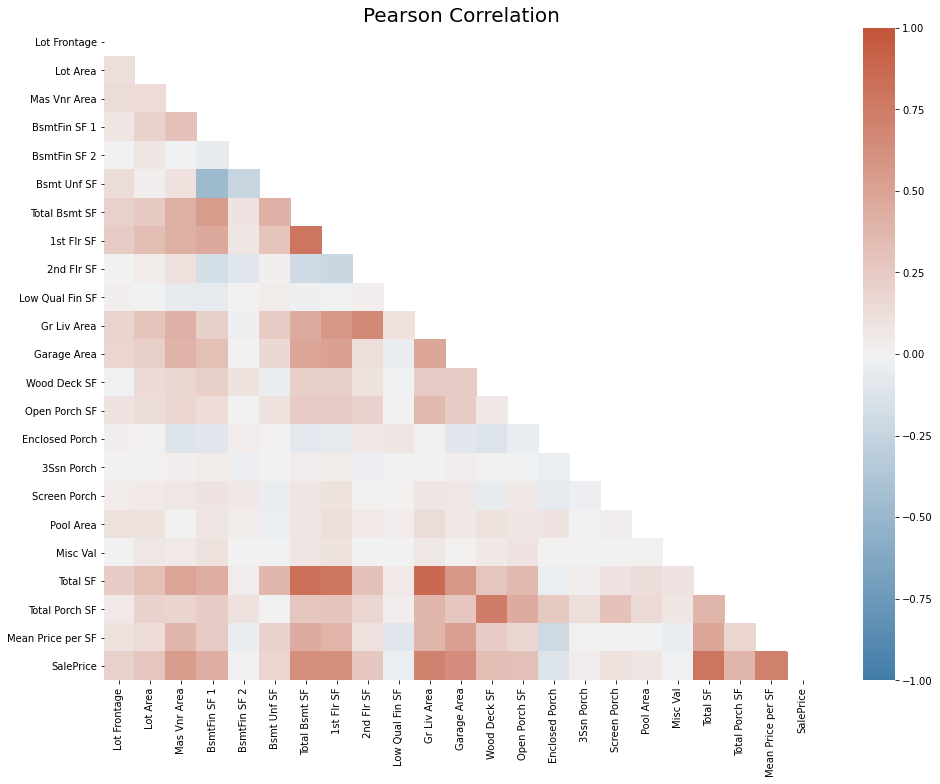

In [49]:
# Pearson for Nominal Data 
new_columns = pd.concat([df[CONTINUOUS_VARIABLE], df[TARGET]], axis = 1)
corr = new_columns.corr(method ='pearson')
plot_correlation (corr, "Pearson Correlation")

In [50]:
strong = 0.65
weak = 0.35
uncorrelated = 0.1

pearson_strongly_correlated = set()
pearson_somehow_correlated = set()
pearson_weakly_correlated = set()
pearson_uncorrelated = set()

corr = new_columns.corr(method ='pearson')['SalePrice'].sort_values(ascending=False)
corr = corr.drop('SalePrice')
print(corr)
corr = corr.to_dict().items()

Total SF             0.789066
Mean Price per SF    0.711853
Gr Liv Area          0.706840
Garage Area          0.638691
Total Bsmt SF        0.631792
1st Flr SF           0.629236
Mas Vnr Area         0.535076
BsmtFin SF 1         0.437077
Total Porch SF       0.384477
Wood Deck SF         0.328602
Open Porch SF        0.313773
Lot Area             0.282978
2nd Flr SF           0.270310
Lot Frontage         0.204462
Bsmt Unf SF          0.181278
Screen Porch         0.112531
Pool Area            0.070849
3Ssn Porch           0.032052
BsmtFin SF 2         0.004901
Misc Val            -0.014657
Low Qual Fin SF     -0.032715
Enclosed Porch      -0.114921
Name: SalePrice, dtype: float64


In [51]:
for variable in corr: 
    if (abs(variable[1]) > strong): 
        pearson_strongly_correlated.add(variable[0])
        
    elif ((abs(variable[1]) <= strong) & (abs(variable[1]) > weak)): 
        pearson_somehow_correlated.add(variable[0])
        
    elif ((abs(variable[1]) <= weak) & (abs(variable[1]) > uncorrelated)): 
        pearson_weakly_correlated.add(variable[0])
        
    elif (abs(variable[1]) <= uncorrelated):
        pearson_uncorrelated.add(variable[0])
        

In [52]:
print("Strong: ", pearson_strongly_correlated) # 0.65 - 1.0
print("\nSomehow: ", pearson_somehow_correlated) # 0.35 - 0.65
print("\nWeak: ", pearson_weakly_correlated) # 0.1 - 0.35
print("\nUncorrelated: ", pearson_uncorrelated) # 0.0 - 0.1

Strong:  {'Total SF', 'Mean Price per SF', 'Gr Liv Area'}

Somehow:  {'Mas Vnr Area', 'Total Porch SF', 'BsmtFin SF 1', 'Garage Area', 'Total Bsmt SF', '1st Flr SF'}

Weak:  {'Screen Porch', '2nd Flr SF', 'Enclosed Porch', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Bsmt Unf SF', 'Lot Frontage'}

Uncorrelated:  {'Pool Area', 'BsmtFin SF 2', '3Ssn Porch', 'Misc Val', 'Low Qual Fin SF'}


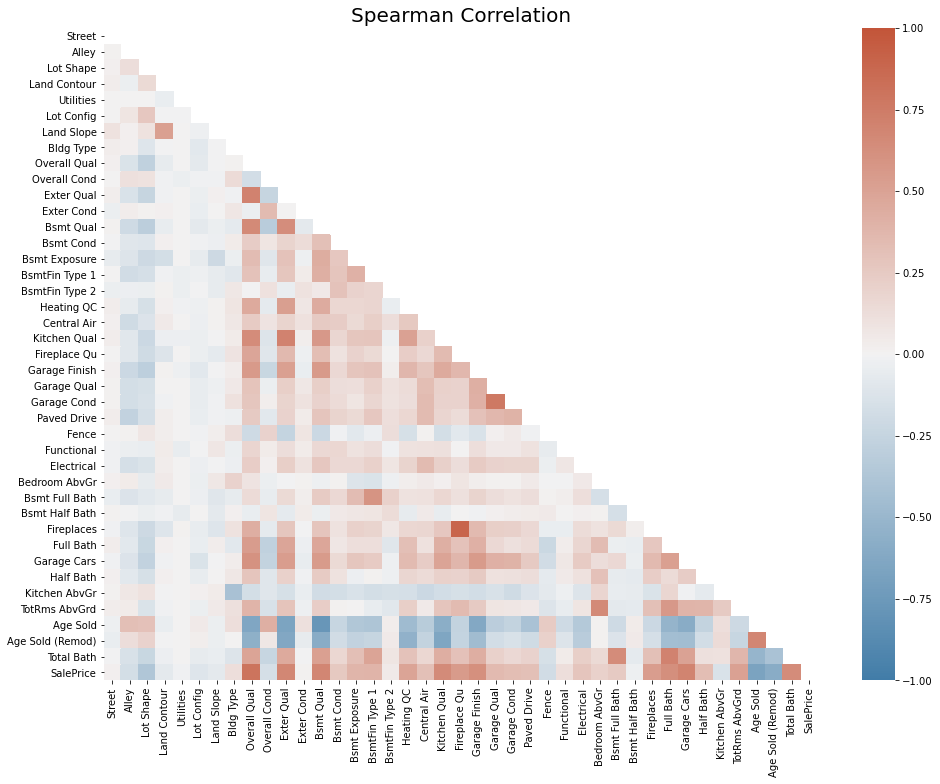

In [53]:
# Spearman for Ordinal and Discrete Data (suitable as they have ordering higher number means more / higher number means better)
new_columns = pd.concat([df[ORDINAL_VARIABLE], df[DISCRETE_VARIABLE], df[TARGET]], axis = 1)
new_columns = new_columns.astype('int') # Change to int before doing correlation
corr = new_columns.corr(method ='spearman')
plot_correlation (corr, "Spearman Correlation")

In [54]:
spearman_strongly_correlated = set()
spearman_somehow_correlated = set()
spearman_weakly_correlated = set()
spearman_uncorrelated = set()

corr = new_columns.corr(method ='spearman')['SalePrice'].sort_values(ascending=False)
corr = corr.drop('SalePrice')
print(corr)
corr = corr.to_dict().items()

Overall Qual        0.799480
Garage Cars         0.697858
Bsmt Qual           0.683544
Exter Qual          0.675147
Kitchen Qual        0.655540
Total Bath          0.646106
Full Bath           0.628258
Garage Finish       0.622875
Fireplace Qu        0.552537
Fireplaces          0.534897
TotRms AbvGrd       0.511728
Heating QC          0.498531
BsmtFin Type 1      0.392130
Bsmt Exposure       0.383617
Garage Qual         0.356341
Garage Cond         0.334315
Half Bath           0.333847
Paved Drive         0.316065
Central Air         0.315090
Electrical          0.285096
Bsmt Cond           0.264604
Bsmt Full Bath      0.257729
Bedroom AbvGr       0.208783
Bldg Type           0.122057
Functional          0.121771
BsmtFin Type 2      0.048979
Street              0.019536
Exter Cond          0.009198
Utilities          -0.008522
Bsmt Half Bath     -0.022149
Land Contour       -0.073338
Land Slope         -0.075402
Lot Config         -0.102303
Kitchen AbvGr      -0.138332
Overall Cond  

In [55]:
for variable in corr: 
    if (abs(variable[1]) > strong): 
        spearman_strongly_correlated.add(variable[0])
        
    elif ((abs(variable[1]) <= strong) & (abs(variable[1]) > weak)): 
        spearman_somehow_correlated.add(variable[0])
        
    elif ((abs(variable[1]) <= weak) & (abs(variable[1]) > uncorrelated)): 
        spearman_weakly_correlated.add(variable[0])
        
    elif (abs(variable[1]) <= uncorrelated):
        spearman_uncorrelated.add(variable[0])

In [56]:
print("Strong: ", spearman_strongly_correlated) # 0.65 - 1.0
print("\nSomehow: ", spearman_somehow_correlated) # 0.35 - 0.65
print("\nWeak: ", spearman_weakly_correlated) # 0.1 - 0.35
print("\nUncorrelated: ", spearman_uncorrelated) # 0.0 - 0.1

Strong:  {'Age Sold', 'Kitchen Qual', 'Exter Qual', 'Bsmt Qual', 'Garage Cars', 'Overall Qual'}

Somehow:  {'Bsmt Exposure', 'Full Bath', 'Fireplaces', 'Age Sold (Remod)', 'TotRms AbvGrd', 'Total Bath', 'Garage Finish', 'Fireplace Qu', 'Heating QC', 'Garage Qual', 'Lot Shape', 'BsmtFin Type 1'}

Weak:  {'Overall Cond', 'Bldg Type', 'Paved Drive', 'Lot Config', 'Bsmt Full Bath', 'Garage Cond', 'Fence', 'Half Bath', 'Alley', 'Electrical', 'Functional', 'Central Air', 'Bsmt Cond', 'Kitchen AbvGr', 'Bedroom AbvGr'}

Uncorrelated:  {'Utilities', 'Street', 'Land Contour', 'Bsmt Half Bath', 'Land Slope', 'Exter Cond', 'BsmtFin Type 2'}


In [57]:
# add both together into one (can be use to test prediction later on)
strongly_correlated = pearson_strongly_correlated | spearman_strongly_correlated
somehow_correlated = pearson_somehow_correlated | spearman_somehow_correlated
weakly_correlated = pearson_weakly_correlated | spearman_weakly_correlated
uncorrelated = pearson_uncorrelated | spearman_uncorrelated

# Binary Features

Some variable such as pool and fireplace can be observe by looking at the the existance 0 or 1

In [58]:
binary_variables = {"Got Alley": "Alley", 
                    "Got 2nd Flr": "2nd Flr SF",
                    "Got Frontage": "Lot Frontage",
                     "Got Bsmt": "Bsmt Qual", 
                     "Got Fireplace": "Fireplace Qu", 
                     "Got Garage": "Garage Area", 
                     "Got Porch": "Total Porch SF", 
                     "Got Pool": "Pool Area", 
                     "Got Misc": "Misc Val" }

for factor_column, column in binary_variables.items():
    df[factor_column] = df[column].apply(lambda x: 1 if x > 0 else 0)

BINARY_VARIABLES = list(binary_variables.keys())
NEW_DUMMY = []
NEW_DUMMY.extend(BINARY_VARIABLES)

In [59]:
df[BINARY_VARIABLES].head()

,Got Alley,Got 2nd Flr,Got Frontage,Got Bsmt,Got Fireplace,Got Garage,Got Porch,Got Pool,Got Misc
0,0,0,1,1,1,1,1,0,0
1,0,0,1,1,0,1,1,0,0
2,0,0,1,1,0,1,1,0,1
3,0,0,1,1,1,1,0,0,0
4,0,1,1,1,1,1,1,0,0


In [60]:
x = "Gr Liv Area"
y = "SalePrice"

## Got Alley*

Mostly no alley but the one with alley are cheaper in price

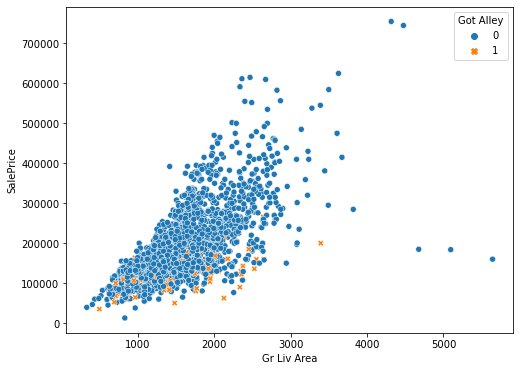

In [61]:
hue = 'Got Alley'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

df = df.drop(columns=['Alley'])
DROPPED_VARIABLE.append('Alley')
ORDINAL_VARIABLE.remove('Alley')

## Got 2nd Floor

Bigger Liv Area seems to have 2nd floor
Seems not much effect on the price 

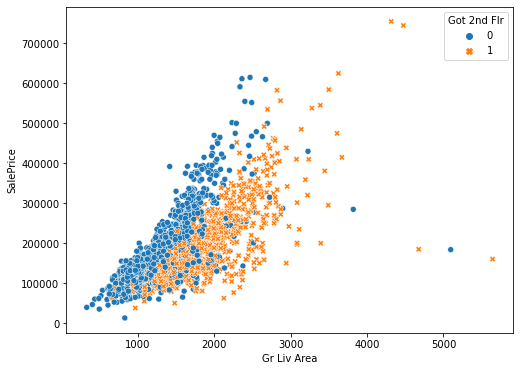

In [62]:
hue = 'Got 2nd Flr'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

df = df.drop(columns=['2nd Flr SF'])
DROPPED_VARIABLE.append('2nd Flr SF')
CONTINUOUS_VARIABLE.remove('2nd Flr SF')

## Got Frontage (DROP)

Most house got frontage
Only a few don't have and no make any different on price

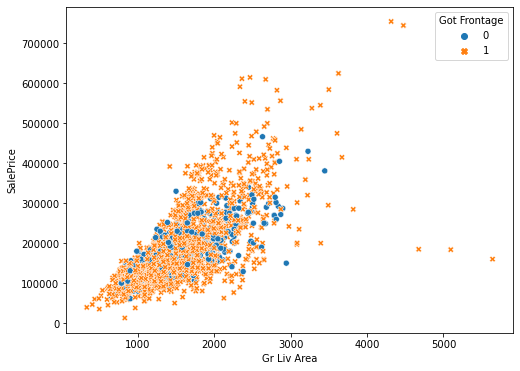

In [63]:
hue = 'Got Frontage'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

df = df.drop(columns=['Got Frontage', 'Lot Frontage'])
DROPPED_VARIABLE.append('Lot Frontage')
NEW_DUMMY.remove('Got Frontage')
CONTINUOUS_VARIABLE.remove('Lot Frontage')

## Got Bsmt*

Mostly got basement
The one without basement seems to have cheaper price

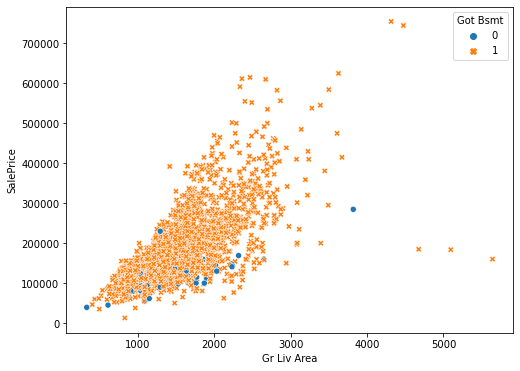

In [64]:
hue = 'Got Bsmt'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

## Got Fireplace*

Smaller house no fireplace
No fireplace seems to be cheaper

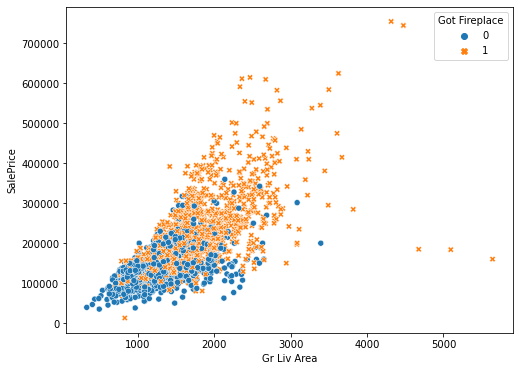

In [65]:
hue = 'Got Fireplace'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

## Got Garage*

Mostly got garage
No garage cheaper

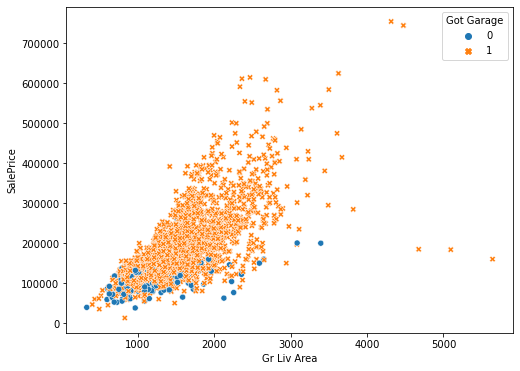

In [66]:
hue = 'Got Garage'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

## Got Porch

Mostly got porch
No porch cheaper (?)

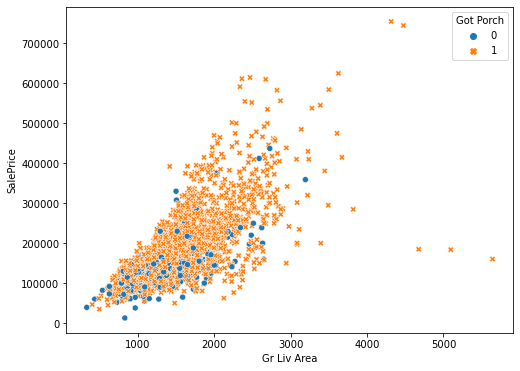

In [67]:
hue = 'Got Porch'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

## Got Pool (DROP)

Mostly no pool
no difference in price

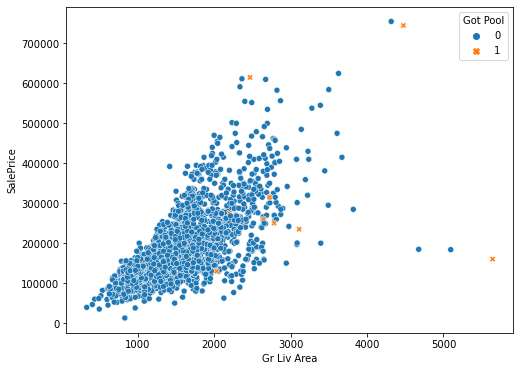

In [68]:
hue = 'Got Pool'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Got Pool', 'Pool Area'])
DROPPED_VARIABLE.append('Pool Area')
NEW_DUMMY.remove('Got Pool')
CONTINUOUS_VARIABLE.remove('Pool Area')

## Got Misc (DROP)

Mostly no misc
no difference in price

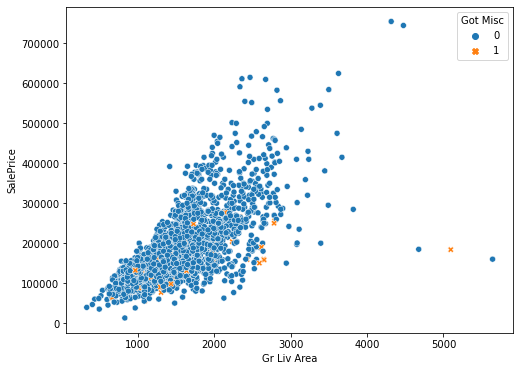

In [69]:
hue = 'Got Misc'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Got Misc', 'Misc Val'])
DROPPED_VARIABLE.append('Misc Val')
NEW_DUMMY.remove('Got Misc')
CONTINUOUS_VARIABLE.remove('Misc Val')

# Nominal Feature
Explore categorical nominal features (cannot be observe previously using correlation function)
Since Gr Liv Area is the highest correlated continuous data (excluding self created ones)
We will use Gr Liv Area vs Sale Price to observe nominal features
Decide whether to keep them 

## MS SubClass (DROP)
There are many different categories and are mostly mentioning the floors (relate to got second floor) and the age (relate to age sold) Safe to drop

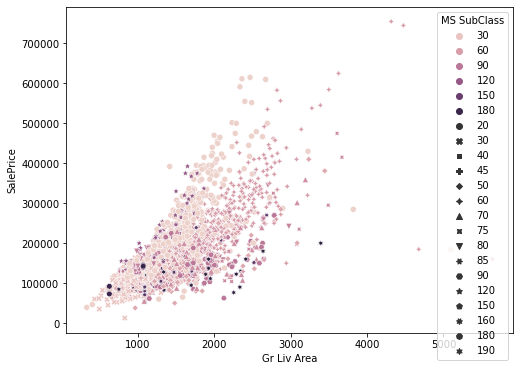

In [70]:
hue = 'MS SubClass'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['MS SubClass'])
DROPPED_VARIABLE.append('MS SubClass')
NOMINAL_VARIABLE.remove('MS SubClass')

## MS Zoning (DROP)
dont really have a pattern here can delete

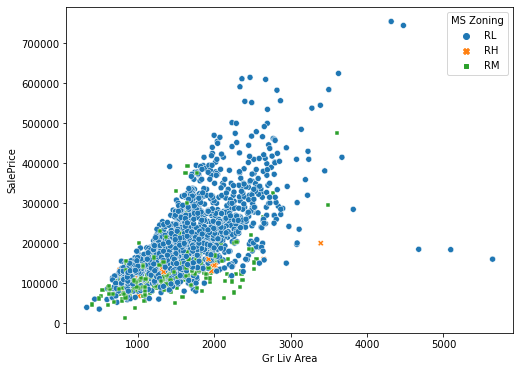

In [71]:
hue = 'MS Zoning'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['MS Zoning'])
DROPPED_VARIABLE.append('MS Zoning')
NOMINAL_VARIABLE.remove('MS Zoning')

## Condition (TO DUMMY)
Another factor that might me important as it means the proximity to varioua conditions
but there are a lot of condition we will need to reduce/combine them
we can see that offsite and railroad seems to have higher prices
street seems to have lower prices 

condition 2 are mostly normal and so we will remove it

In [72]:
df['Condition 1'].replace(to_replace = ['Artery', 'Feedr'], value = 'Street', inplace = True)
df['Condition 1'].replace(to_replace = ['RRNn', 'RRAn', 'RRNe', 'RRAe'], value = 'Railroad', inplace = True)
df['Condition 1'].replace(to_replace = ['PosN', 'PosA'], value = 'Park', inplace = True)

df['Condition 2'].replace(to_replace = ['Artery', 'Feedr'], value = 'Street', inplace = True)
df['Condition 2'].replace(to_replace = ['RRNn', 'RRAn', 'RRNe', 'RRAe'], value = 'Railroad', inplace = True)
df['Condition 2'].replace(to_replace = ['PosN', 'PosA'], value = 'Park', inplace = True)

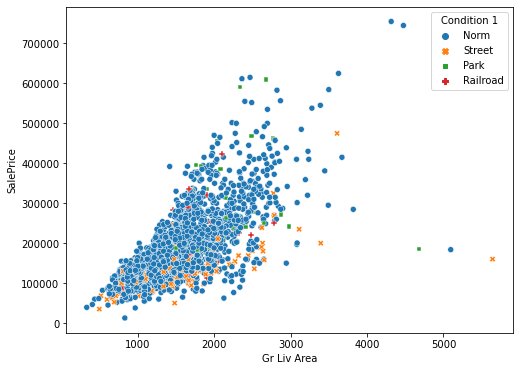

In [73]:
hue = 'Condition 1'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

In [74]:
# create dummy variables for condition 1, not needed for norm (drop norm)
new_dummy = pd.get_dummies(df["Condition 1"], prefix="Near")
new_dummy = new_dummy.drop(columns=['Near_Norm'], axis = 1)
df = pd.concat([df, new_dummy], axis=1)
df = df.drop(columns=['Condition 1'])


DROPPED_VARIABLE.append('Condition 1')
NOMINAL_VARIABLE.remove('Condition 1')

for n in new_dummy:
    NEW_DUMMY += [n]

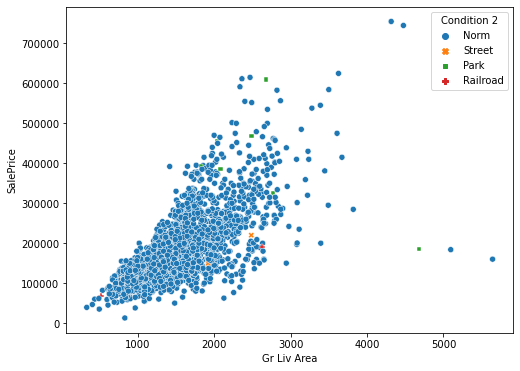

In [75]:
hue = 'Condition 2'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

df = df.drop(columns=['Condition 2'])
DROPPED_VARIABLE.append('Condition 2')
NOMINAL_VARIABLE.remove('Condition 2')

## House Style (DROP)
Similar to 'Has Second Floor'

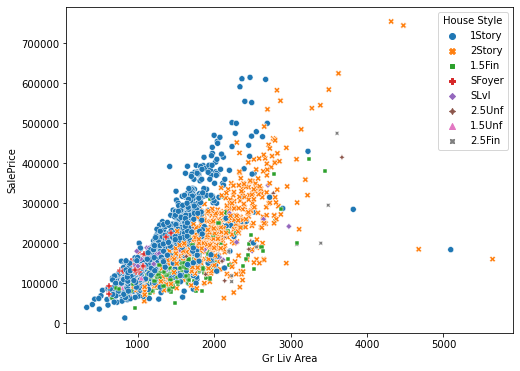

In [76]:
hue = 'House Style'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['House Style'])
DROPPED_VARIABLE.append('House Style')
NOMINAL_VARIABLE.remove('House Style')

## Roof (DROP)
do not really have a pattern for roof style
basically all same material for rood matl

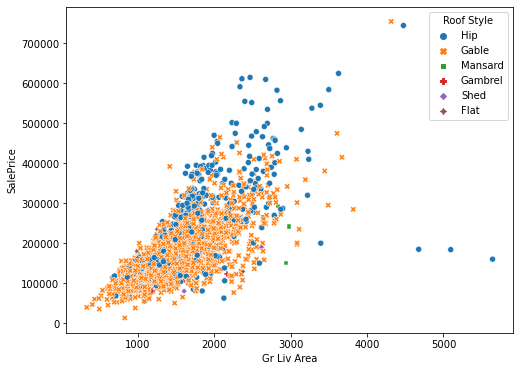

In [77]:
hue = 'Roof Style'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Roof Style'])
DROPPED_VARIABLE.append('Roof Style')
NOMINAL_VARIABLE.remove('Roof Style')

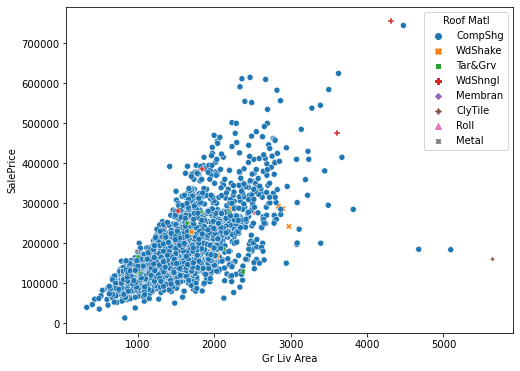

In [78]:
hue = 'Roof Matl'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Roof Matl'])

DROPPED_VARIABLE.append('Roof Matl')
NOMINAL_VARIABLE.remove('Roof Matl')

## Exterior (DROP)
Too many different variables and seems to stack together with no pattern

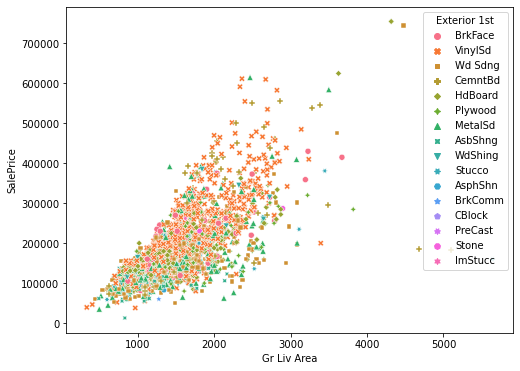

In [79]:
hue = 'Exterior 1st'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Exterior 1st'])

DROPPED_VARIABLE.append('Exterior 1st')
NOMINAL_VARIABLE.remove('Exterior 1st')

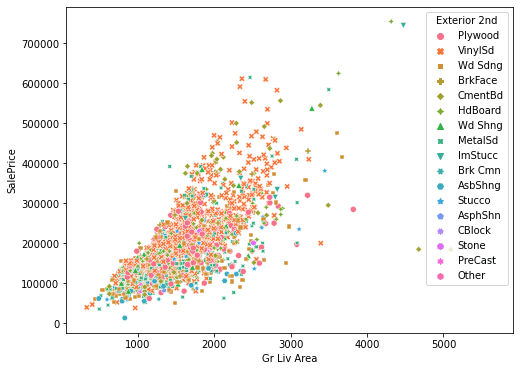

In [80]:
hue = 'Exterior 2nd'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Exterior 2nd'])

DROPPED_VARIABLE.append('Exterior 2nd')
NOMINAL_VARIABLE.remove('Exterior 2nd')

## Mas Vnr Type (TO DUMMY)
No MasVnr seems to be cheaper

In [81]:
df['Mas Vnr Type'].replace(to_replace = ['BrkFace', 'BrkCmn'], value = 'Brk', inplace = True)

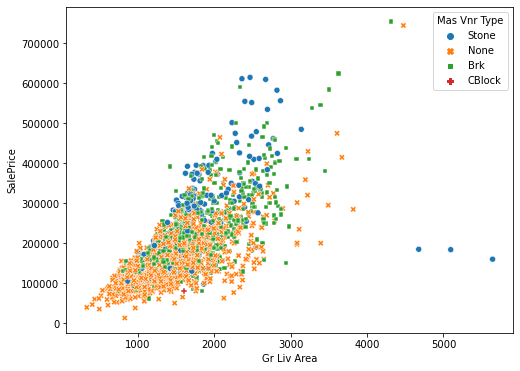

In [82]:
hue = 'Mas Vnr Type'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

In [83]:
new_dummy = pd.get_dummies(df["Mas Vnr Type"], prefix="MasVrn")
new_dummy = new_dummy.drop(columns=['MasVrn_None', 'MasVrn_CBlock'], axis = 1)
df = pd.concat([df, new_dummy], axis=1)

for n in new_dummy:
    NEW_DUMMY += [n]
df = df.drop(columns=['Mas Vnr Type'])

DROPPED_VARIABLE.append('Mas Vnr Type')
NOMINAL_VARIABLE.remove('Mas Vnr Type')

## Foundation (TO DUMMY)
CBlock and BrkTil lower price,
PConc higher price

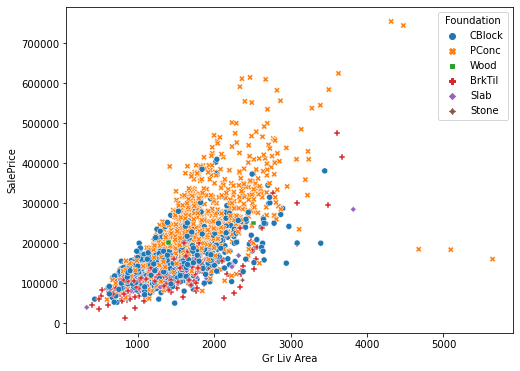

In [84]:
hue = 'Foundation'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

In [85]:
# make into dummy but drop slab, stone, wood cause less value
new_dummy = pd.get_dummies(df["Foundation"], prefix="Foundation")
new_dummy = new_dummy.drop(columns=['Foundation_Wood', 'Foundation_Slab', 'Foundation_Stone'], axis = 1)
df = pd.concat([df, new_dummy], axis=1)

for n in new_dummy:
    NEW_DUMMY += [n]
df = df.drop(columns=['Foundation'])

DROPPED_VARIABLE.append('Foundation')
NOMINAL_VARIABLE.remove('Foundation')

## Heating (DROP)
mostly same and no pattern, can remove

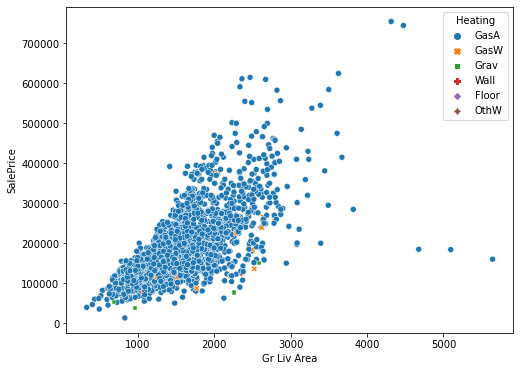

In [86]:
hue = 'Heating'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Heating'])

DROPPED_VARIABLE.append('Heating')
NOMINAL_VARIABLE.remove('Heating')

## Garage Type (DROP)
No garage and detached tend to be cheaper price, this means it is the same as 'got garage'

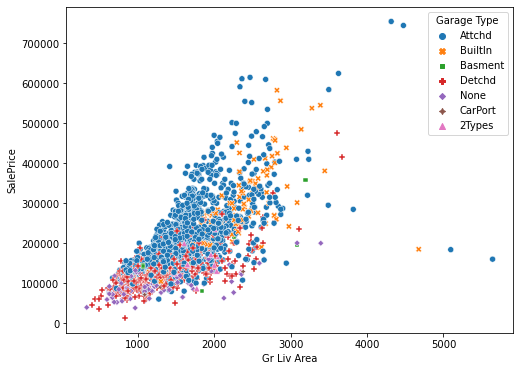

In [87]:
hue = 'Garage Type'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);
df = df.drop(columns=['Garage Type'])

DROPPED_VARIABLE.append('Garage Type')
NOMINAL_VARIABLE.remove('Garage Type')

## Sale Type (DROP but CREATE NEW)
reduce variables since some variables quite related, 
Reduce to 5 categories
Warranty Deed (WD) - WD, CWD, VWD
Just constructed - New
Court Officer - COD
Contract - Con, ConLW, ConLI, ConLD
Other - Oth

In [88]:
df['Sale Type'].replace(to_replace = ['WD ', 'CWD', 'VWD'], value = 'WD', inplace = True)
df['Sale Type'].replace(to_replace = ['Con', 'ConLw', 'ConLI', 'ConLD'], value = 'Contract', inplace = True)

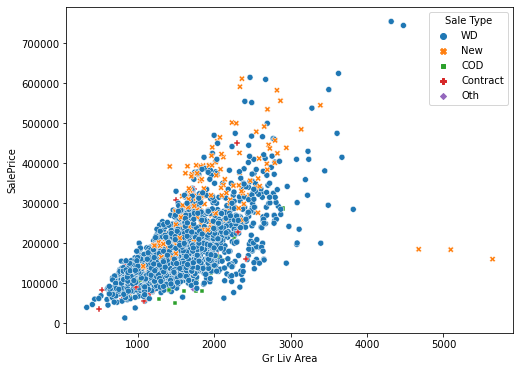

In [89]:
hue = 'Sale Type'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

New house seems to cost more than others, create a variable indicating the house is new

In [90]:
df["Newly Constructed"] = df["Sale Type"].apply(lambda x: 1 if x == "New" else 0)
NEW_DUMMY.append('Newly Constructed')
df = df.drop(columns=['Sale Type'])

DROPPED_VARIABLE.append('Sale Type')
NOMINAL_VARIABLE.remove('Sale Type')

## Sale Condition (TO DUMMY)
Partial, Normal and Abnormal got more values, 
Partial seems to cost more
Abnormal seems to cost less

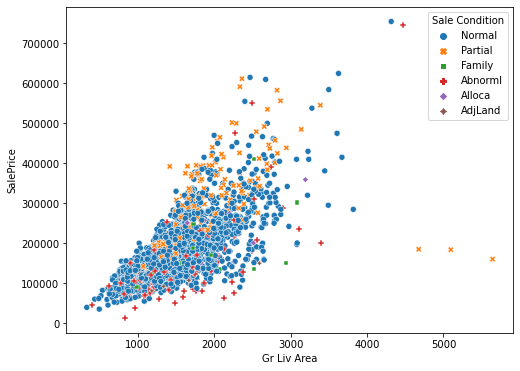

In [91]:
hue = 'Sale Condition'
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x=x, y=y, hue=hue, style = hue, ax = ax);

In [92]:
# make into dummy but drop slab, stone, wood cause less value
df["Sale Partial"] = df["Sale Condition"].apply(lambda x: 1 if x == "Partial" else 0)
df["Sale Abnormal"] = df["Sale Condition"].apply(lambda x: 1 if x == "Abnorml" else 0)

NEW_DUMMY += ['Sale Partial', 'Sale Abnormal']
df = df.drop(columns=['Sale Condition'])

DROPPED_VARIABLE.append('Sale Condition')
NOMINAL_VARIABLE.remove('Sale Condition')

## Neighborhood
Obviously some neighborhood cost less while some cost more

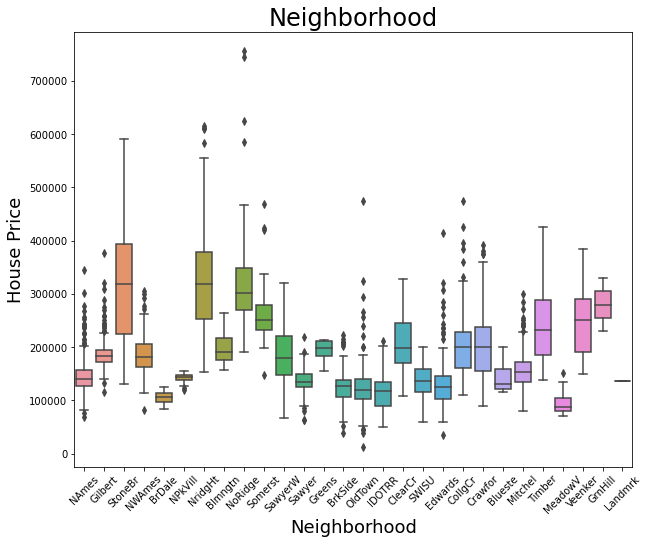

In [93]:
_, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df, ax=ax)
ax.set_title("Neighborhood", fontsize=24)
ax.set_xlabel("Neighborhood", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("House Price", fontsize=18);

In [94]:
# too many columns if use dummy variables, use label encoder instead
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Neighborhood'] = labelencoder.fit_transform(df['Neighborhood'])

# Outlier
df with dummy
df_findourlier no dummy

0    2748
1      14
Name: outlier, dtype: int64


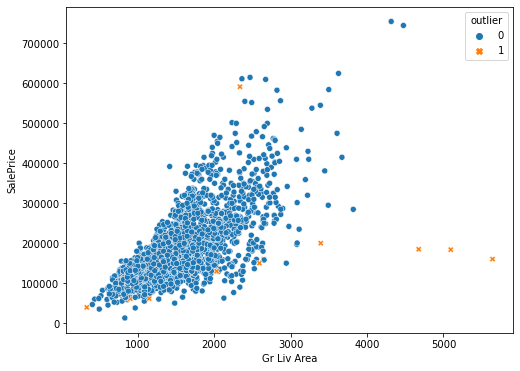

In [95]:
from sklearn.ensemble import IsolationForest

# df_findourlier = df.drop(NEW_DUMMY, axis = 1) # no include dummy variables in outlier finding

contaminate = 0.005
iso = IsolationForest(contamination = contaminate)
iso.fit(df)
df["outlier"] = pd.Series(iso.predict(df))

# outlier will be label as 1
df["outlier"] = df["outlier"].apply(lambda x: 1 if x < 0 else 0)
print(df["outlier"].value_counts())

fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(data=df, x="Gr Liv Area", y="SalePrice", hue="outlier", style = "outlier", ax = ax);

In [96]:
df = df.drop(df[df['outlier'] == 1].index)
df = df.drop('outlier', axis = 1)
df = df.reset_index(drop=True)

# Factor Analysis

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

In [98]:
VARIABLE = CONTINUOUS_VARIABLE
VARIABLE.extend(DISCRETE_VARIABLE) # discrete variable should be scaled too
x_scale = df[VARIABLE]

TO_DROP = TARGET + VARIABLE
cat_variable = df.drop(TO_DROP, axis = 1)

In [99]:
#scaler = StandardScaler()
scaler = QuantileTransformer()
x_scale = pd.DataFrame(scaler.fit_transform(x_scale.values), columns=x_scale.columns, index=x_scale.index)

x = pd.concat([x_scale, cat_variable], axis = 1)

In [100]:
def univariant_selection(x, y, func):
    # k = 30, choose top 30 
    select_features = SelectKBest(score_func = func, k = 30)
    
    fit = select_features.fit(x, y)  # fit() is to run the score functions of x and y
    select_columns = pd.DataFrame(x.columns) # put column name in dataframe
    select_scores = pd.DataFrame(fit.scores_) # put score in dataframe
    features_scores = pd.concat([select_columns, select_scores],axis=1) # concatenate the columns
    features_scores.columns = ['Feature','Score']  # name of columns
    #print(features_scores.nlargest(30,'Score'))  # print out and show best features
    
    # Choose 30 top features and apply before doing prediction
    # top_features = features_scores.nlargest(30,'Score')
    # x = x[top_features["Feature"]]
    
    return features_scores.nlargest(30,'Score')

In [101]:
x = pd.concat([x_scale, cat_variable], axis = 1)
# x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# univariant selection
# f_regression works better with numerical data
score_df_num = univariant_selection(x_scale, y, f_regression)
# chi2 works better with categorical data
score_df_cat = univariant_selection(cat_variable, y, chi2)
# obtain both score and concat them
score_df = pd.concat([score_df_num, score_df_cat], axis = 0)

In [102]:
# select the largest score from concat 
score_df.nlargest(30,'Score')
top_features = score_df.nlargest(30,'Score')
x = x[top_features["Feature"]]

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [104]:
def prediction (data, target):
    for i, (train, test) in enumerate(KFold(3).split(data, target)):
        x_train, x_test = data.iloc[train].copy(), data.iloc[test].copy()
        y_train, y_test = target.iloc[train].copy(), target.iloc[test].copy()
    
        # Scale y value
        #y_scaler = StandardScaler()
        y_scaler = QuantileTransformer()
        #y_scaler = MinMaxScaler()
        # y_scaler = QuantileTransformer(output_distribution='uniform')
        y_train = y_train.values.reshape((-1, 1))
        y_test = y_test.values.reshape((-1, 1))
        y_train = y_scaler.fit_transform(y_train).ravel()
        y_test = y_scaler.transform(y_test).ravel()
        
        reg = LinearRegression()
        reg.fit(x_train, y_train)
        pred = reg.predict(x_test)
        name = f'Linear {i}'
        print(f'{name} rmse:', np.sqrt(mean_squared_error(y_test, pred)))
        
        reg = DecisionTreeRegressor()
        reg.fit(x_train, y_train)
        pred = reg.predict(x_test)
        name = f'DecTree {i}'
        print(f'{name} rmse:', np.sqrt(mean_squared_error(y_test, pred)))
        
        reg = RandomForestRegressor()
        reg.fit(x_train, y_train)
        pred = reg.predict(x_test)
        name = f'RandForest {i}'
        print(f'{name} rmse:', np.sqrt(mean_squared_error(y_test, pred)))
        
        reg = Ridge()
        reg.fit(x_train, y_train)
        pred = reg.predict(x_test)
        name = f'Ridge {i}'
        print(f'{name} rmse:', np.sqrt(mean_squared_error(y_test, pred)))
        
        print()

In [105]:
data = x
target = df['SalePrice']

prediction (data, target)

Linear 0 rmse: 0.10818266739702771
DecTree 0 rmse: 0.13755663700875065
RandForest 0 rmse: 0.10447678150398021
Ridge 0 rmse: 0.10812213724659166

Linear 1 rmse: 0.09453597153906927
DecTree 1 rmse: 0.1335808703912621
RandForest 1 rmse: 0.09316257229907499
Ridge 1 rmse: 0.09440800892329132

Linear 2 rmse: 0.10762206436517699
DecTree 2 rmse: 0.14981845898285526
RandForest 2 rmse: 0.10662580352156102
Ridge 2 rmse: 0.10771134953937318

